# Neurips Analysis Notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Globals

In [2]:
point_sizes = [10, 15, 20, 25, 30] # 40, 50, 60, 70, 80, 90, 100]

entropy_file = "entropy"
eigenvalue_file = "eigenvalues"
losses_file = "losses"

In [3]:
def load_data(file_type: str):
    """
    Load data from all of the experiments for 
    a specific property.
    
    Parameters
    ----------
    file_type : str
            The data you want loaded. Choose from the variables:
                - entropy_file
                - eigenvalue_file
                - losses_file
    Returns
    -------
    data : dict
            Dictionary of the data {"10": ..., "20": ...}
    """
    data = {}
    for item in point_sizes:
        data[str(item)] = np.load(
            f"{item}_analysis/{file_type}_{item}.npy", 
            allow_pickle=True
        )
        
    return data
        

### Entropy Study

In [4]:
entropy_data = load_data(entropy_file)

In [5]:
plot_data = {"rnd": [], "random": [], "approximate_maximum": []}
error_data = {"rnd": [], "random": [], "approximate_maximum": []}
for value in entropy_data.values():
    for item in value.item():
        plot_data[item].append(value.item()[item][0])
        error_data[item].append(value.item()[item][1])

/tikhome/stovey/miniconda3/envs/zincware/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/tikhome/stovey/miniconda3/envs/zincware/lib/python3.9/site-packages/numpy/ma/core.py:3377: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
/tikhome/stovey/miniconda3/envs/zincware/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/tikhome/stovey/miniconda3/envs/zincware/lib/python3.9/site-packages/numpy/ma/core.py:3377: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
/tikhome/stovey/miniconda3/envs/zincware/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, floa

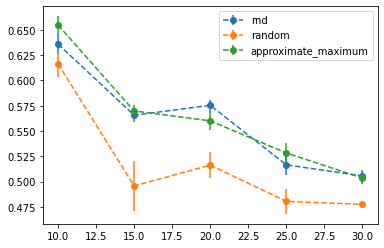

In [6]:
for item in ["rnd", "random", "approximate_maximum"]:
    plt.errorbar(
        point_sizes, 
        plot_data[item], 
        yerr=error_data[item], 
        label=item,
        marker='o',
        linestyle="--"
    )
plt.legend() 
plt.show()

### Eigenvalue Study

In [7]:
eigenvalue_data = load_data(eigenvalue_file)

In [30]:
plot_data = {"rnd": [], "random": [], "approximate_maximum": []}
error_data = {"rnd": [], "random": [], "approximate_maximum": []}
for value in eigenvalue_data.values():
    for item in value.item():
        plot_data[item].append(value.item()[item][0])
        error_data[item].append(value.item()[item][1])

/tikhome/stovey/miniconda3/envs/zincware/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/tikhome/stovey/miniconda3/envs/zincware/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/tikhome/stovey/miniconda3/envs/zincware/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/tikhome/stovey/miniconda3/envs/zincware/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/tikhome/stovey/miniconda3/envs/zincware/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the 

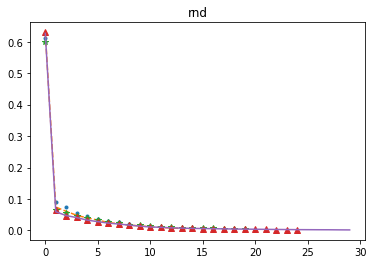

/tikhome/stovey/miniconda3/envs/zincware/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/tikhome/stovey/miniconda3/envs/zincware/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/tikhome/stovey/miniconda3/envs/zincware/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/tikhome/stovey/miniconda3/envs/zincware/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/tikhome/stovey/miniconda3/envs/zincware/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the 

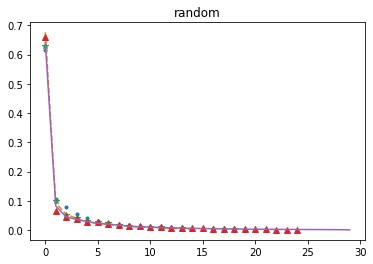

/tikhome/stovey/miniconda3/envs/zincware/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/tikhome/stovey/miniconda3/envs/zincware/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/tikhome/stovey/miniconda3/envs/zincware/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/tikhome/stovey/miniconda3/envs/zincware/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/tikhome/stovey/miniconda3/envs/zincware/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the 

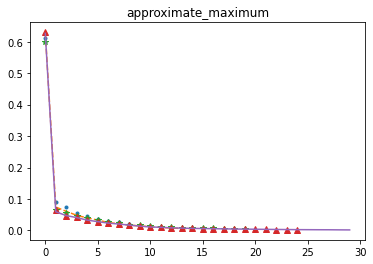

In [33]:
for item in ["rnd", "random", "approximate_maximum"]:
    plt.plot(plot_data[item][0][::-1], '.')
    plt.plot(plot_data[item][1][::-1], '--')
    plt.plot(plot_data[item][2][::-1], '*')
    plt.plot(plot_data[item][3][::-1], '^')
    plt.plot(plot_data[item][4][::-1], '-')

    plt.title(item)
    plt.show()


### Model Performance

In [10]:
model_data = load_data(losses_file)

In [11]:
plot_data = {"rnd": [], "random": [], "approximate_maximum": []}
error_data = {"rnd": [], "random": [], "approximate_maximum": []}
for value in model_data.values():
    for item in value.item():
        plot_data[item].append(value.item()[item][0])
        error_data[item].append(value.item()[item][1])

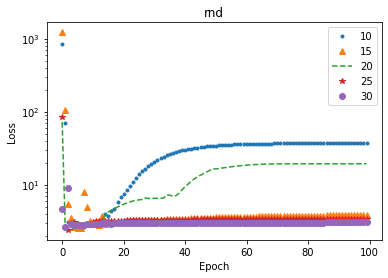

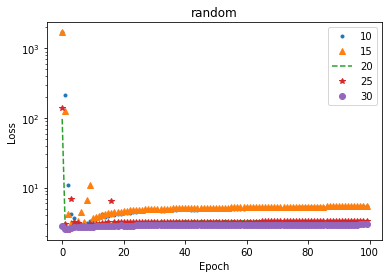

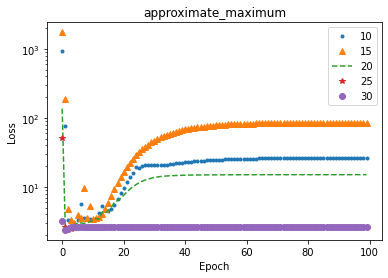

In [28]:
for item in ["rnd", "random", "approximate_maximum"]:
    plt.semilogy(plot_data[item][0], '.', label="10")
    plt.semilogy(plot_data[item][1], '^', label="15")
    plt.semilogy(plot_data[item][2], '--', label="20")
    plt.semilogy(plot_data[item][3], '*', label="25")
    plt.semilogy(plot_data[item][4], 'o', label="30")
    plt.title(item)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

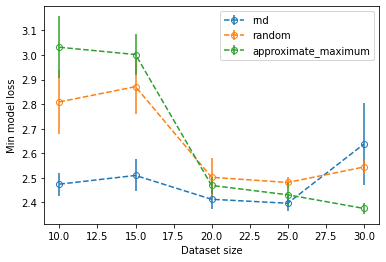

In [19]:
x_arr = [10, 15, 20, 25, 30]
for item in ["rnd", "random", "approximate_maximum"]:
    dat = []
    err = []
    for errors, dataset in zip(error_data[item], plot_data[item]):
        min_val = np.argmin(dataset)
        dat.append(dataset[min_val])
        err.append(errors[min_val])
    plt.errorbar(x_arr, dat, yerr=err, marker='o', mfc='none', linestyle='--', label=item)

plt.xlabel("Dataset size")
plt.ylabel("Min model loss")
plt.legend()
plt.show()
